# R68 Efficiencies
This notebook plots the trigger and cut efficiencies used in the R68 analysis.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

exec(open("nb_setup.py").read()) #Is there a better way to do this?

from R68_efficiencies import *

../mplstyles
3.0.3
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


In [2]:
E_thresh=50 #[eV] Possible analysis threshold
E_test=np.linspace(0,1e3,1000)

fig_w=7

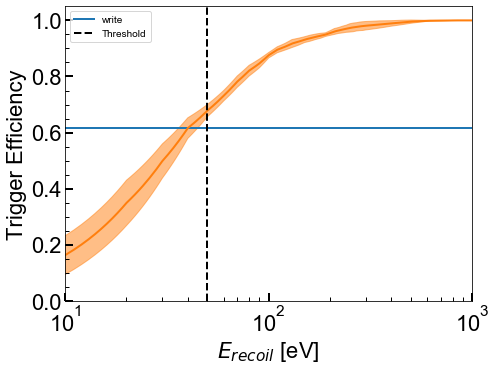

In [16]:
#Trigger efficiency function

fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))

ax.axhline(eff_write, color = next(ax._get_lines.prop_cycler)['color'], label='write')
ax.axhspan(eff_write-deff_write, eff_write+deff_write, alpha=0.5)

ax.plot(E_test,trigEff(E_test),color='C1')
ax.fill_between(E_test,trigEff(E_test)-dtrigEff(E_test),trigEff(E_test)+dtrigEff(E_test),alpha=0.5,color='C1')

ax.axvline(E_thresh, color='k', linestyle='--', linewidth=2, label='Threshold')

ax.set_xlim(10,1e3)
ax.set_xscale('log')
ax.set_ylim(0,1.05)
ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Trigger Efficiency')

ax.legend()
plt.tight_layout()

plt.savefig('figures/trig_eff.png')
plt.savefig('figures/trig_eff.eps')
plt.savefig('figures/trig_eff.pdf')

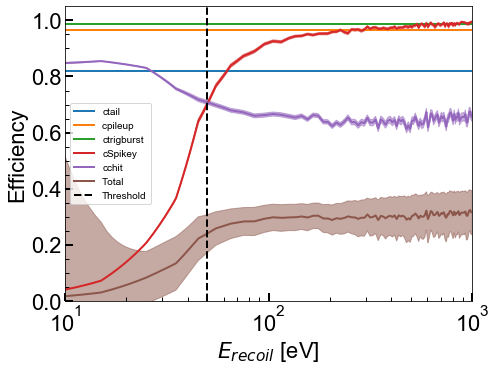

In [15]:
#Cut efficiencies

fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))


ax.axhline(eff_tail, color = next(ax._get_lines.prop_cycler)['color'], label='ctail')
ax.axhspan(eff_tail-deff_tail, eff_tail+deff_tail, alpha=0.5)

ax.axhline(eff_pileup, color = next(ax._get_lines.prop_cycler)['color'], label='cpileup ')
ax.axhspan(eff_pileup-deff_pileup, eff_pileup+deff_pileup, alpha=0.5)

ax.axhline(eff_trigburst, color = next(ax._get_lines.prop_cycler)['color'], label='ctrigburst')
ax.axhspan(eff_trigburst-deff_trigburst, eff_trigburst+deff_trigburst, alpha=0.5)

line,=ax.plot(E_test, spikeEff(E_test), label='cSpikey')
ax.fill_between(E_test, spikeEff(E_test)-dspikeEff(E_test)[1], spikeEff(E_test)+dspikeEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test,chisqEff(E_test), label='cchit')
ax.fill_between(E_test, chisqEff(E_test)-dchisqEff(E_test)[1], chisqEff(E_test)+dchisqEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test, cutEff(E_test), label='Total')
ax.fill_between(E_test, cutEff(E_test)-dcutEff(E_test)[1], cutEff(E_test)+dcutEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

ax.axvline(E_thresh, color='k', linestyle='--', linewidth=2, label='Threshold')

ax.set_xlim(10,1e3)
ax.set_xscale('log')
ax.set_ylim(0,1.05)
ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Efficiency')
ax.legend()

plt.tight_layout()

# Shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig('figures/cut_effs.png')
plt.savefig('figures/cut_effs.eps')
plt.savefig('figures/cut_effs.pdf')